# Imports

In [118]:
import os
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

import statsmodels.api as sm

SPOTIPY_CLIENT_ID = '520cdb9e1e8e401480625d095e3ad2ed'
SPOTIPY_CLIENT_SECRET = '3541a7b1df4b47e8877d386ffe58807b'
SPOTIPY_REDIRECT_URI = 'http://localhost:8889/callback'

In [3]:
username = 'hp5s41fd8dkrl0mi77gwptmco'
scope = 'playlist-modify-public'

token = util.prompt_for_user_token(username,scope,
                                   client_id= SPOTIPY_CLIENT_ID,
                                   client_secret = SPOTIPY_CLIENT_SECRET,
                                   redirect_uri = SPOTIPY_REDIRECT_URI)
sp = spotipy.Spotify(auth=token)

# Import data from Every Noise at Once playlists

In [4]:
# The Spotify API does not provide genres for the majority of tracks and albums, so I will be using the auto-generated
# playlists created by Every Noise at Once (everynoise.com) to populate a dataframe with information.

In [5]:
# define Spotify playlist ids
hip_hop_playlist = '6MXkE0uYF4XwU4VTtyrpfP'
pop_playlist = '6gS3HhOiI17QNojjPuPzqc'
rock_playlist = '7dowgSWOmvdpwNkGFMUs6e'
trap_playlist = '60SHtDyagDjPnUpC7x1UD9'
edm_playlist = '3pDxuMpz94eDs7WFqudTbZ'

# create empty track id lists for each playlist
hip_hop_tracks = []
pop_tracks = []
rock_tracks = []
trap_tracks = []
edm_tracks = []

# query Spotify for information about each track in each playlist (limit of 100 tracks each)
hip_hop_info = sp.playlist_tracks(hip_hop_playlist)['items']
pop_info = sp.playlist_tracks(pop_playlist)['items']
rock_info = sp.playlist_tracks(rock_playlist)['items']
trap_info = sp.playlist_tracks(trap_playlist)['items']
edm_info = sp.playlist_tracks(edm_playlist)['items']

# iterate through queries and add track ids to lists created above

for idx,item in enumerate(hip_hop_info):
    hip_hop_tracks.append(item['track']['id'])
    
for idx,item in enumerate(pop_info):
    pop_tracks.append(item['track']['id'])
    
for idx,item in enumerate(rock_info):
    rock_tracks.append(item['track']['id'])
    
for idx,item in enumerate(trap_info):
    trap_tracks.append(item['track']['id'])
    
for idx,item in enumerate(edm_info):
    edm_tracks.append(item['track']['id'])

In [6]:
# create empty lists for each audio feature available from Spotify for each playlist
# audio features: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness,
# valence, tempo, time_signature

In [7]:
# hip hop
hip_hop_danceability = []
hip_hop_energy = []
hip_hop_key = []
hip_hop_loudness = []
hip_hop_mode = []
hip_hop_speechiness = []
hip_hop_acousticness = []
hip_hop_instrumentalness = []
hip_hop_liveness = []
hip_hop_valence = []
hip_hop_tempo = []
hip_hop_time_signature = []

# pop
pop_danceability = []
pop_energy = []
pop_key = []
pop_loudness = []
pop_mode = []
pop_speechiness = []
pop_acousticness = []
pop_instrumentalness = []
pop_liveness = []
pop_valence = []
pop_tempo = []
pop_time_signature = []

# rock
rock_danceability = []
rock_energy = []
rock_key = []
rock_loudness = []
rock_mode = []
rock_speechiness = []
rock_acousticness = []
rock_instrumentalness = []
rock_liveness = []
rock_valence = []
rock_tempo = []
rock_time_signature = []

# trap
trap_danceability = []
trap_energy = []
trap_key = []
trap_loudness = []
trap_mode = []
trap_speechiness = []
trap_acousticness = []
trap_instrumentalness = []
trap_liveness = []
trap_valence = []
trap_tempo = []
trap_time_signature = []

# edm
edm_danceability = []
edm_energy = []
edm_key = []
edm_loudness = []
edm_mode = []
edm_speechiness = []
edm_acousticness = []
edm_instrumentalness = []
edm_liveness = []
edm_valence = []
edm_tempo = []
edm_time_signature = []

In [8]:
# iterate through the hip hop track list and append feature values to respective lists
hip_hop_features = sp.audio_features(hip_hop_tracks)
for idx,id in enumerate(hip_hop_tracks):
    hip_hop_danceability.append(hip_hop_features[idx]['danceability'])
    hip_hop_energy.append(hip_hop_features[idx]['energy'])
    hip_hop_key.append(hip_hop_features[idx]['key'])
    hip_hop_loudness.append(hip_hop_features[idx]['loudness'])
    hip_hop_mode.append(hip_hop_features[idx]['mode'])
    hip_hop_speechiness.append(hip_hop_features[idx]['speechiness'])
    hip_hop_acousticness.append(hip_hop_features[idx]['acousticness'])
    hip_hop_instrumentalness.append(hip_hop_features[idx]['instrumentalness'])
    hip_hop_liveness.append(hip_hop_features[idx]['liveness'])
    hip_hop_valence.append(hip_hop_features[idx]['valence'])
    hip_hop_tempo.append(hip_hop_features[idx]['tempo'])
    hip_hop_time_signature.append(hip_hop_features[idx]['time_signature'])

# iterate through the pop track list and append feature values to respective lists
pop_features = sp.audio_features(pop_tracks)
for idx,id in enumerate(pop_tracks):
    pop_danceability.append(pop_features[idx]['danceability'])
    pop_energy.append(pop_features[idx]['energy'])
    pop_key.append(pop_features[idx]['key'])
    pop_loudness.append(pop_features[idx]['loudness'])
    pop_mode.append(pop_features[idx]['mode'])
    pop_speechiness.append(pop_features[idx]['speechiness'])
    pop_acousticness.append(pop_features[idx]['acousticness'])
    pop_instrumentalness.append(pop_features[idx]['instrumentalness'])
    pop_liveness.append(pop_features[idx]['liveness'])
    pop_valence.append(pop_features[idx]['valence'])
    pop_tempo.append(pop_features[idx]['tempo'])
    pop_time_signature.append(pop_features[idx]['time_signature'])

# iterate through the rock track list and append feature values to respective lists
rock_features = sp.audio_features(rock_tracks)
for idx,id in enumerate(rock_tracks):
    rock_danceability.append(rock_features[idx]['danceability'])
    rock_energy.append(rock_features[idx]['energy'])
    rock_key.append(rock_features[idx]['key'])
    rock_loudness.append(rock_features[idx]['loudness'])
    rock_mode.append(rock_features[idx]['mode'])
    rock_speechiness.append(rock_features[idx]['speechiness'])
    rock_acousticness.append(rock_features[idx]['acousticness'])
    rock_instrumentalness.append(rock_features[idx]['instrumentalness'])
    rock_liveness.append(rock_features[idx]['liveness'])
    rock_valence.append(rock_features[idx]['valence'])
    rock_tempo.append(rock_features[idx]['tempo'])
    rock_time_signature.append(rock_features[idx]['time_signature'])

# iterate through the trap track list and append feature values to respective lists
trap_features = sp.audio_features(trap_tracks)
for idx,id in enumerate(trap_tracks):
    trap_danceability.append(trap_features[idx]['danceability'])
    trap_energy.append(trap_features[idx]['energy'])
    trap_key.append(trap_features[idx]['key'])
    trap_loudness.append(trap_features[idx]['loudness'])
    trap_mode.append(trap_features[idx]['mode'])
    trap_speechiness.append(trap_features[idx]['speechiness'])
    trap_acousticness.append(trap_features[idx]['acousticness'])
    trap_instrumentalness.append(trap_features[idx]['instrumentalness'])
    trap_liveness.append(trap_features[idx]['liveness'])
    trap_valence.append(trap_features[idx]['valence'])
    trap_tempo.append(trap_features[idx]['tempo'])
    trap_time_signature.append(trap_features[idx]['time_signature'])

# iterate through the edm track list and append feature values to respective lists
edm_features = sp.audio_features(edm_tracks)
for idx,id in enumerate(edm_tracks):
    edm_danceability.append(edm_features[idx]['danceability'])
    edm_energy.append(edm_features[idx]['energy'])
    edm_key.append(edm_features[idx]['key'])
    edm_loudness.append(edm_features[idx]['loudness'])
    edm_mode.append(edm_features[idx]['mode'])
    edm_speechiness.append(edm_features[idx]['speechiness'])
    edm_acousticness.append(edm_features[idx]['acousticness'])
    edm_instrumentalness.append(edm_features[idx]['instrumentalness'])
    edm_liveness.append(edm_features[idx]['liveness'])
    edm_valence.append(edm_features[idx]['valence'])
    edm_tempo.append(edm_features[idx]['tempo'])
    edm_time_signature.append(edm_features[idx]['time_signature'])

In [57]:
hip_hop_df = pd.DataFrame(data=zip(hip_hop_danceability,
                                   hip_hop_energy,
                                   hip_hop_key,
                                   hip_hop_loudness,
                                   hip_hop_mode,
                                   hip_hop_speechiness,
                                   hip_hop_acousticness,
                                   hip_hop_instrumentalness,
                                   hip_hop_liveness,
                                   hip_hop_valence,
                                   hip_hop_tempo,
                                   hip_hop_time_signature),
                         index=hip_hop_tracks,
                         columns=['danceability',
                                  'energy',
                                  'key',
                                  'loudness',
                                  'mode',
                                  'speechiness',
                                  'acousticness',
                                  'instrumentalness',
                                  'liveness',
                                  'valence',
                                  'tempo',
                                  'time_signature'])
hip_hop_df['genre'] = 'hip hop'

In [58]:
pop_df = pd.DataFrame(data=zip(pop_danceability,
                                   pop_energy,
                                   pop_key,
                                   pop_loudness,
                                   pop_mode,
                                   pop_speechiness,
                                   pop_acousticness,
                                   pop_instrumentalness,
                                   pop_liveness,
                                   pop_valence,
                                   pop_tempo,
                                   pop_time_signature),
                         index=pop_tracks,
                         columns=['danceability',
                                  'energy',
                                  'key',
                                  'loudness',
                                  'mode',
                                  'speechiness',
                                  'acousticness',
                                  'instrumentalness',
                                  'liveness',
                                  'valence',
                                  'tempo',
                                  'time_signature'])
pop_df['genre'] = 'pop'

In [59]:
rock_df = pd.DataFrame(data=zip(rock_danceability,
                                   rock_energy,
                                   rock_key,
                                   rock_loudness,
                                   rock_mode,
                                   rock_speechiness,
                                   rock_acousticness,
                                   rock_instrumentalness,
                                   rock_liveness,
                                   rock_valence,
                                   rock_tempo,
                                   rock_time_signature),
                         index=rock_tracks,
                         columns=['danceability',
                                  'energy',
                                  'key',
                                  'loudness',
                                  'mode',
                                  'speechiness',
                                  'acousticness',
                                  'instrumentalness',
                                  'liveness',
                                  'valence',
                                  'tempo',
                                  'time_signature'])
rock_df['genre'] = 'rock'

In [60]:
trap_df = pd.DataFrame(data=zip(trap_danceability,
                                   trap_energy,
                                   trap_key,
                                   trap_loudness,
                                   trap_mode,
                                   trap_speechiness,
                                   trap_acousticness,
                                   trap_instrumentalness,
                                   trap_liveness,
                                   trap_valence,
                                   trap_tempo,
                                   trap_time_signature),
                         index=trap_tracks,
                         columns=['danceability',
                                  'energy',
                                  'key',
                                  'loudness',
                                  'mode',
                                  'speechiness',
                                  'acousticness',
                                  'instrumentalness',
                                  'liveness',
                                  'valence',
                                  'tempo',
                                  'time_signature'])
trap_df['genre'] = 'trap'

In [61]:
edm_df = pd.DataFrame(data=zip(edm_danceability,
                                   edm_energy,
                                   edm_key,
                                   edm_loudness,
                                   edm_mode,
                                   edm_speechiness,
                                   edm_acousticness,
                                   edm_instrumentalness,
                                   edm_liveness,
                                   edm_valence,
                                   edm_tempo,
                                   edm_time_signature),
                         index=edm_tracks,
                         columns=['danceability',
                                  'energy',
                                  'key',
                                  'loudness',
                                  'mode',
                                  'speechiness',
                                  'acousticness',
                                  'instrumentalness',
                                  'liveness',
                                  'valence',
                                  'tempo',
                                  'time_signature'])
edm_df['genre'] = 'edm'

In [62]:
combined_df = pd.concat(objs=[hip_hop_df,pop_df,rock_df,trap_df,edm_df],
                        sort=False)

In [63]:
combined_df = combined_df.replace(to_replace=np.nan, value=0)
combined_df = combined_df.rename_axis('track_id')

In [66]:
combined_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
track_id,,,,,,,,,,,,,
3Ti0GdlrotgwsAVBBugv0I,0.848,0.666,0,-6.547,1,0.274,0.17300,0.000699,0.1290,0.744,96.662,4,hip hop
1w29UTa5uUvIri2tWtZ12Y,0.862,0.642,6,-13.652,0,0.101,0.10200,0.000000,0.2720,0.765,99.201,4,hip hop
0IVAlb0cFCH1cQ974iR1TU,0.782,0.589,1,-4.827,1,0.189,0.14800,0.000000,0.1640,0.869,90.438,4,hip hop
48ZUwXrEOhaXLCxvmRYhZv,0.737,0.890,4,-8.443,1,0.158,0.00556,0.001710,0.0801,0.809,105.848,4,hip hop
30oTS7bm0aH3p7lqjEIu8q,0.875,0.745,1,-5.878,1,0.269,0.02270,0.000002,0.2870,0.749,95.201,4,hip hop


# Exploratory Analysis

In [67]:
combined_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.671658,0.690258,5.482000,-6.716668,0.590000,0.128858,0.132812,0.034743,0.186422,0.541810,120.234506,3.980000
std,0.159110,0.162850,3.613279,2.819912,0.492326,0.105842,0.174872,0.145452,0.154262,0.226796,26.631779,0.199197
min,0.215000,0.107000,0.000000,-18.943000,0.000000,0.024700,0.000005,0.000000,0.023400,0.066300,56.046000,1.000000
25%,0.568500,0.583750,2.000000,-8.150250,0.000000,0.043000,0.015075,0.000000,0.088700,0.367750,98.244750,4.000000
50%,0.696500,0.693000,6.000000,-6.193000,1.000000,0.080250,0.056400,0.000002,0.122000,0.545500,121.020000,4.000000
75%,0.791500,0.819250,9.000000,-4.799750,1.000000,0.209250,0.179500,0.000447,0.235000,0.724750,136.008750,4.000000
max,0.970000,0.990000,11.000000,-1.501000,1.000000,0.399000,0.911000,0.944000,0.918000,0.967000,191.692000,5.000000


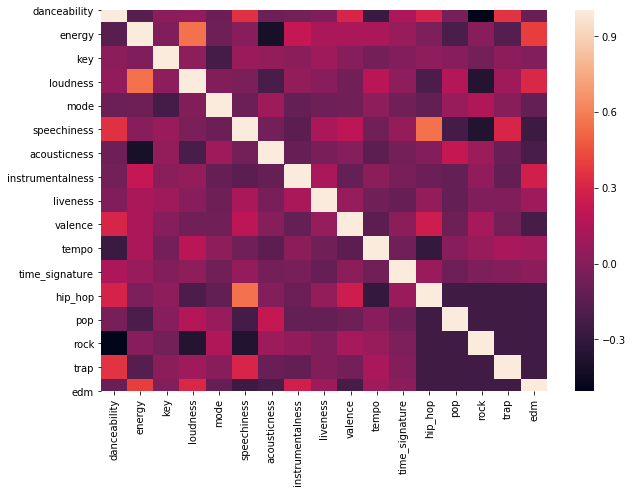

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(combined_df_corr)

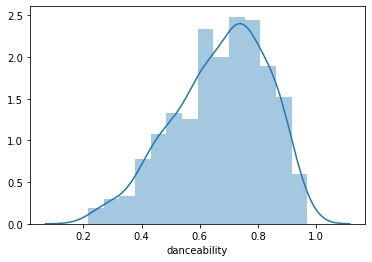

In [33]:
sns.distplot(combined_df['danceability'])

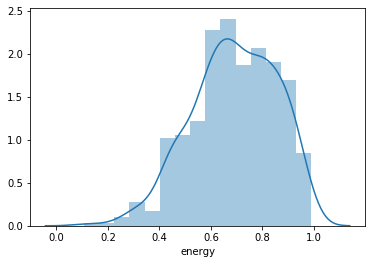

In [34]:
sns.distplot(combined_df['energy'])

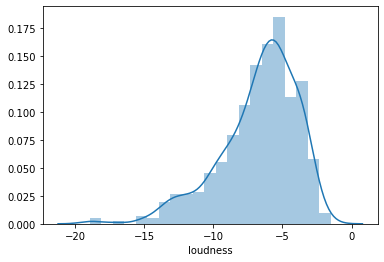

In [35]:
sns.distplot(combined_df['loudness'])

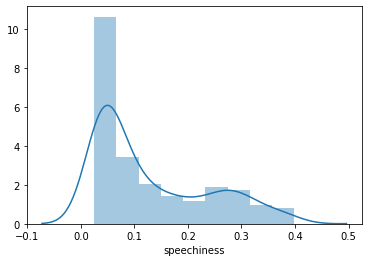

In [36]:
sns.distplot(combined_df['speechiness'])

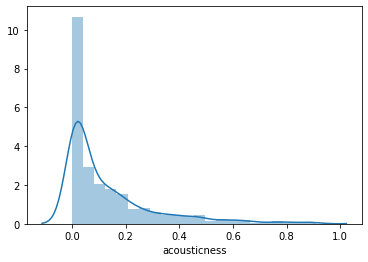

In [37]:
sns.distplot(combined_df['acousticness'])

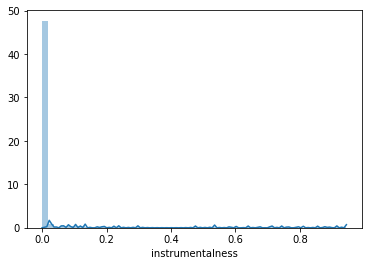

In [38]:
sns.distplot(combined_df['instrumentalness'])

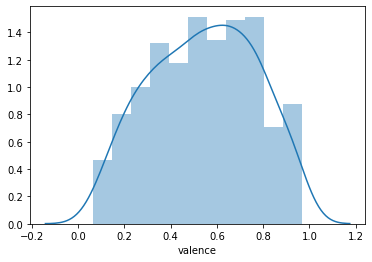

In [39]:
sns.distplot(combined_df['valence'])

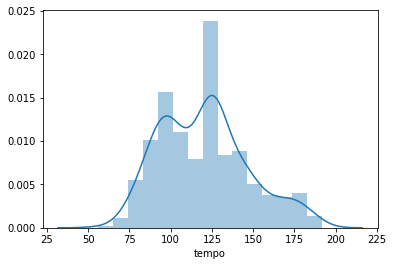

In [40]:
sns.distplot(combined_df['tempo'])

# Let's try a logistic regression model to predict whether a song is hip hop or not

In [69]:
combined_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre'],
      dtype='object')

In [70]:
# create binary columns for each genre for use in the model
genre = pd.get_dummies(combined_df['genre'])

# concatenate the dummy variables into the main table
combined_df = pd.concat([combined_df,genre],axis=1)

In [71]:
combined_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,edm,hip hop,pop,rock,trap
track_id,,,,,,,,,,,,,,,,,,
3Ti0GdlrotgwsAVBBugv0I,0.848,0.666,0,-6.547,1,0.274,0.17300,0.000699,0.1290,0.744,96.662,4,hip hop,0,1,0,0,0
1w29UTa5uUvIri2tWtZ12Y,0.862,0.642,6,-13.652,0,0.101,0.10200,0.000000,0.2720,0.765,99.201,4,hip hop,0,1,0,0,0
0IVAlb0cFCH1cQ974iR1TU,0.782,0.589,1,-4.827,1,0.189,0.14800,0.000000,0.1640,0.869,90.438,4,hip hop,0,1,0,0,0
48ZUwXrEOhaXLCxvmRYhZv,0.737,0.890,4,-8.443,1,0.158,0.00556,0.001710,0.0801,0.809,105.848,4,hip hop,0,1,0,0,0
30oTS7bm0aH3p7lqjEIu8q,0.875,0.745,1,-5.878,1,0.269,0.02270,0.000002,0.2870,0.749,95.201,4,hip hop,0,1,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(combined_df.drop(['genre','edm','hip hop','pop','rock','trap'],axis=1), 
                                                    combined_df['hip hop'], test_size=0.30, 
                                                    random_state=101)

In [105]:
# instantiate the Logistic Regression model and fit the training data to the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Joe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
# predict the outcomes for the test data
log_predict = logmodel.predict(X_test)

In [108]:
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       119
           1       0.86      0.39      0.53        31

    accuracy                           0.86       150
   macro avg       0.86      0.69      0.73       150
weighted avg       0.86      0.86      0.84       150



## Use recursive feature elimination to down-select model features

In [109]:
rfe_logmodel = LogisticRegression()

estimator = SVR(kernel="linear")

rfe = RFE(estimator, 8)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True  True  True False  True False False]
[1 1 4 1 1 1 1 1 5 1 2 3]


In [110]:
combined_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre', 'edm', 'hip hop', 'pop', 'rock', 'trap'],
      dtype='object')

In [111]:
rfe_features = ['danceability','energy','loudness','mode','speechiness',
                     'acousticness','instrumentalness','liveness']
X=combined_df[rfe_features]
y=combined_df['hip hop']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                         Results: Logit
Model:               Logit             Pseudo R-squared:  inf   
Dependent Variable:  hip hop           AIC:               inf   
Date:                2020-07-21 20:51  BIC:               inf   
No. Observations:    500               Log-Likelihood:    -inf  
Df Model:            7                 LL-Null:           0.0000
Df Residuals:        492               LLR p-value:       1.0000
Converged:           1.0000            Scale:             1.0000
No. Iterations:      7.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
danceability     -0.7841   0.7119 -1.1014 0.2707 -2.1794  0.6112
energy           -3.3842   0.6445 -5.2505 0.0000 -4.6475 -2.1209
loudness         -

C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [112]:
# remove variables with a P value greater than 0.05 (not statistically significant)
relevant_features = ['energy','mode','speechiness']
X=combined_df[relevant_features]
y=combined_df['hip hop']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: hip hop          AIC:              inf   
Date:               2020-07-21 20:51 BIC:              inf   
No. Observations:   500              Log-Likelihood:   -inf  
Df Model:           2                LL-Null:          0.0000
Df Residuals:       497              LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     7.0000                                   
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
energy        -4.0877   0.4108 -9.9500 0.0000 -4.8929 -3.2825
mode          -0.9373   0.2543 -3.6861 0.0002 -1.4356 -0.4389
speechiness   11.9898   1.2428  9.6475 0.0000  9.5540 14.42

C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Joe\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


C:\Users\Joe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [121]:
print(confusion_matrix(y_test, y_pred))

TypeError: 'numpy.ndarray' object is not callable

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       121
           1       0.00      0.00      0.00        29

    accuracy                           0.79       150
   macro avg       0.40      0.49      0.44       150
weighted avg       0.65      0.79      0.71       150

